# Random Signals

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Independent Processes

The independence of random signals is a desired property in many applications of statistical signal processing, as well as uncorrelatedness and orthogonality. The concept of independence is introduced in the following together with a discussion of the links to uncorrelatedness and orthogonality.

### Definition

Two stochastic events are said to be [independent](https://en.wikipedia.org/wiki/Independence_(probability_theory%29) if the probability of occurrence of one event is not affected by the occurrence of the other event. Or more specifically, if their joint probability equals the product of their individual probabilities. In terms of the bivariate probability density function (PDF) of two continuous-amplitude real-valued random processes $x[k]$ and $y[k]$ this reads

\begin{equation}
p_{xy}(\theta_x, \theta_y, k_x, k_y) = p_x(\theta_x, k_x) \cdot p_y(\theta_y, k_y)
\end{equation}

where $p_x(\theta_x, k_x)$ and $p_y(\theta_y, k_y)$ denote the univariate ([marginal](https://en.wikipedia.org/wiki/Marginal_distribution)) PDFs of the random processes for the time-instances $k_x$ and $k_y$, respectively. The bivariate PDF of two independent random processes is given by the multiplication of their univariate PDFs. It follows that the [second-order ensemble average](ensemble_averages.ipynb#Second-Order-Ensemble-Averages) for a linear mapping is given as

\begin{equation}
E\{ x[k_x] \cdot y[k_y] \} = E\{ x[k_x] \} \cdot E\{ y[k_y] \}
\end{equation}

The linear second-order ensemble average of two independent random signals is equal to the multiplication of their linear first-order ensemble averages. For jointly wide-sense stationary (WSS) processes, the bivariate PDF does only depend on the difference $\kappa = k_x - k_y$ of the time instants. Hence, two jointly WSS random signals are independent if 

\begin{equation}
\begin{split}
p_{xy}(\theta_x, \theta_y, \kappa) &= p_x(\theta_x, k_x) \cdot p_y(\theta_y, k_x - \kappa) \\
&= p_x(\theta_x) \cdot p_y(\theta_y, \kappa)
\end{split}
\end{equation}

Above bivariate PDF is rewritten using the definition of [conditional probabilities](https://en.wikipedia.org/wiki/Conditional_probability) in order to specialize the definition of independence to one WSS random signal $x[k]$ 

\begin{equation}
p_{xy}(\theta_x, \theta_y, \kappa) = p_{y|x}(\theta_x, \theta_y, \kappa) \cdot p_x(\theta_x)
\end{equation}

where $p_{y|x}(\theta_x, \theta_y, \kappa)$ denotes the conditional probability that $y[k - \kappa]$ takes the amplitude value $\theta_y$ under the condition that $x[k]$ takes the amplitude value $\theta_x$. Under the assumption that $y[k-\kappa] = x[k-\kappa]$ and substituting $\theta_x$ and $\theta_y$ by $\theta_1$ and $\theta_2$, independence for one random signal is defined as

\begin{equation}
p_{xx}(\theta_1, \theta_2, \kappa) = 
\begin{cases}
p_x(\theta_1) \cdot \delta(\theta_2 - \theta_1) & \text{for } \kappa = 0  \\
p_x(\theta_1) \cdot p_x(\theta_2, \kappa) & \text{for } \kappa \neq 0
\end{cases}
\end{equation}

since the conditional probability $p_{x[k]|x[k-\kappa]}(\theta_1, \theta_2, \kappa) = \delta(\theta_2 - \theta_1)$ for $\kappa = 0$ since this represents a sure event. The bivariate PDF of an independent random signal is equal to the product of the univariate PDFs of the signal and the time-shifted signal for $\kappa \neq 0$. A random signal for which this condition does not hold shows statistical dependencies between samples. These dependencies can be exploited for instance for coding or prediction.

#### Example - Comparison of bivariate PDF and product of marginal PDFs

The following example estimates the bivariate PDF $p_{xx}(\theta_1, \theta_2, \kappa)$ of a WSS random signal $x[k]$ by computing its two-dimensional histogram. The univariate PDFs $p_x(\theta_1)$ and $p_x(\theta_2, \kappa)$ are additionally estimated. Both the estimated bivariate PDF and the product of the two univariate PDFs $p_x(\theta_1) \cdot p_x(\theta_2, \kappa)$ are plotted for different $\kappa$.

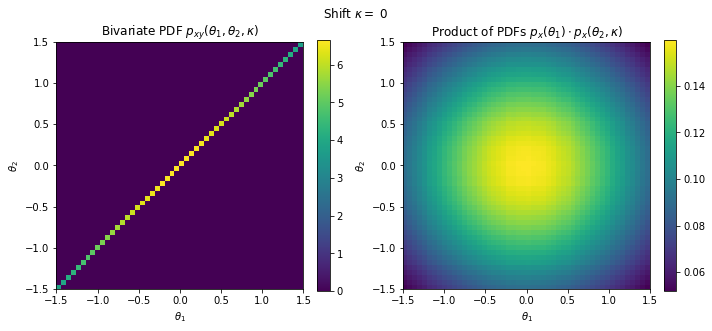

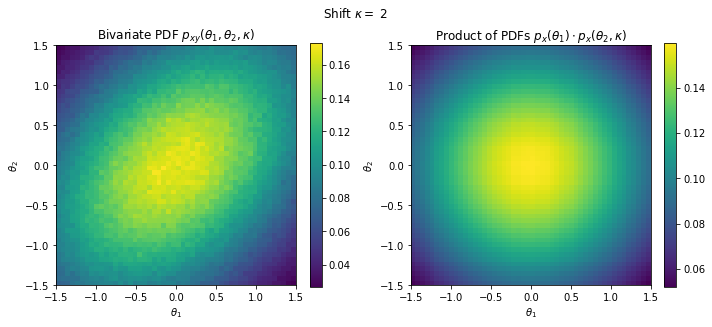

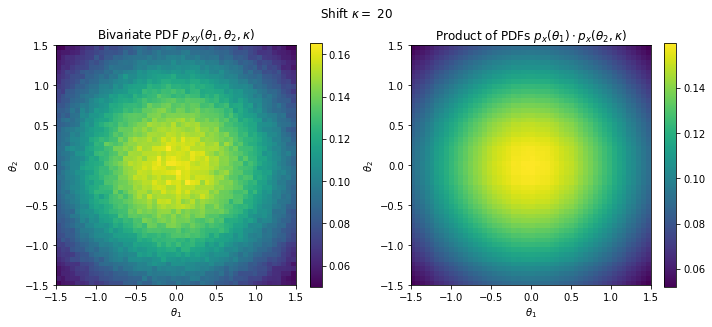

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 10000000  # number of random samles
M = 50  # number of bins for bivariate/marginal histograms


def compute_plot_histograms(kappa):
    # shift signal
    x2 = np.concatenate((x1[kappa:], np.zeros(kappa)))

    # compute bivariate and marginal histograms
    pdf_xx, x1edges, x2edges = np.histogram2d(x1, x2, bins=(M,M), range=((-1.5, 1.5),(-1.5, 1.5)), normed=True)
    pdf_x1, _ = np.histogram(x1, bins=M, range=(-1.5, 1.5), density=True)
    pdf_x2, _ = np.histogram(x2, bins=M, range=(-1.5, 1.5), density=True)

    # plot results
    fig = plt.figure(figsize=(10, 10))
    
    plt.subplot(121, aspect='equal')
    plt.pcolormesh(x1edges, x2edges, pdf_xx)
    plt.xlabel(r'$\theta_1$')
    plt.ylabel(r'$\theta_2$')
    plt.title(r'Bivariate PDF $p_{{xy}}(\theta_1, \theta_2, \kappa)$')
    plt.colorbar(fraction=0.046)

    plt.subplot(122, aspect='equal')
    plt.pcolormesh(x1edges, x2edges, np.outer(pdf_x1, pdf_x2))
    plt.xlabel(r'$\theta_1$')
    plt.ylabel(r'$\theta_2$')
    plt.title(r'Product of PDFs $p_x(\theta_1) \cdot p_x(\theta_2, \kappa)$')
    plt.colorbar(fraction=0.046)
    
    fig.suptitle('Shift $\kappa =$ {:<2.0f}'.format(kappa), y=0.72)
    fig.tight_layout()


# generate signal
x = np.random.normal(size=N)
x1 = np.convolve(x, [1, .5, .3, .7, .3], mode='same')

# compute and plot the PDFs for various shifts
compute_plot_histograms(0)
compute_plot_histograms(2)
compute_plot_histograms(20)

**Exercise**

* With the given results, how can you evaluate the independence of the random signal?
* Can the random signal assumed to be independent?

Solution: According to the definition of independence, the bivariate PDF and the product of the univariate PDFs has to be equal for $\kappa \neq 0$. This is obviously not the case for $\kappa=2$. Hence, the random signal is not independent in a strict sense. However for $\kappa=20$ the condition for independence is sufficiently fulfilled, considering the statistical uncertainty due to a finite number of samples. 

### Independence versus Uncorrelatedness 

Two continuous-amplitude real-valued jointly WSS random processes $x[k]$ and $y[k]$ are termed as [uncorrelated](correlation_functions.ipynb#Properties) if their cross-correlation function (CCF) is equal to the product of their linear means, $\varphi_{xy}[\kappa] = \mu_x \cdot \mu_y$. If two random signals are independent then they are also uncorrelated. This can be proven by introducing above findings for the linear second-order ensemble average of independent random signals into the definition of the CCF

\begin{equation}
\varphi_{xy}[\kappa] = E \{ x[k] \cdot y[k - \kappa] \} = E \{ x[k] \} \cdot E \{ y[k - \kappa] \} = \mu_x \cdot \mu_y
\end{equation}

where the last equality is a consequence of the assumed wide-sense stationarity. The reverse, that two uncorrelated signals are also independent does not hold in general from this result.

The auto-correlation function (ACF) of an [uncorrelated signal](correlation_functions.ipynb#Properties) is given as $\varphi_{xx}[\kappa] = \mu_x^2 + \sigma_x^2 \cdot \delta[\kappa]$. Introducing the definition of independence into the definition of the ACF yields

\begin{equation}
\begin{split}
\varphi_{xx}[\kappa] &= E \{ x[k] \cdot x[k - \kappa] \} \\
&= 
\begin{cases}
E \{ x^2[k] \} & \text{for } \kappa = 0 \\
E \{ x[k] \} \cdot E \{ x[k - \kappa] \} & \text{for } \kappa \neq 0
\end{cases} \\
&= 
\begin{cases}
\mu_x^2 + \sigma_x^2 & \text{for } \kappa = 0 \\
\mu_x^2 & \text{for } \kappa \neq 0
\end{cases} \\
&= \mu_x^2 + \sigma_x^2 \delta[\kappa]
\end{split}
\end{equation}

where the result for $\kappa = 0$ follows from the bivariate PDF $p_{xx}(\theta_1, \theta_2, \kappa)$ of an independent signal, as derived above. It can be concluded from this result that an independent random signal is also uncorrelated. The reverse, that an uncorrelated signal is independent does not hold in general.

### Independence versus Orthogonality

In geometry, two vectors are said to be [orthogonal](https://en.wikipedia.org/wiki/Orthogonality) if their dot product equals zero. This definition is frequently applied to finite-length random signals by interpreting them as vectors. The relation between independence, correlatedness and orthogonality is derived in the following.

Let's assume two continuous-amplitude real-valued jointly wide-sense ergodic random signals $x_N[k]$ and $y_M[k]$ with finite lengths $N$ and $M$, respectively. The CCF $\varphi_{xy}[\kappa]$ between both can be reformulated as follows

\begin{equation}
\begin{split}
\varphi_{xy}[\kappa] &= \frac{1}{N} \sum_{k=0}^{N-1} x_N[k] \cdot y_M[k-\kappa] \\
&= \frac{1}{N} < \mathbf{x}_N, \mathbf{y}_M[\kappa] > 
\end{split}
\end{equation}

where $<\cdot, \cdot>$ denotes the [dot product](https://en.wikipedia.org/wiki/Dot_product). The $(N+2M-2) \times 1$ vector $\mathbf{x}_N$ is defined as 

$$\mathbf{x}_N = \left[ \mathbf{0}^T_{(M-1) \times 1}, x[0], x[1], \dots, x[N-1], \mathbf{0}^T_{(M-1) \times 1} \right]^T$$

where $\mathbf{0}_{(M-1) \times 1}$ denotes the zero vector of length $M-1$. The $(N+2M-2) \times 1$ vector $\mathbf{y}_M[\kappa]$ is defined as 

$$\mathbf{y}_M = \left[ \mathbf{0}^T_{\kappa \times 1}, y[0], y[1], \dots, y[M-1], \mathbf{0}^T_{(N+M-2-\kappa) \times 1}  \right]^T$$

It follows from above definition of orthogonality that two finite-length random signals are orthogonal if their CCF is zero. This implies that at least one of the two signals has to be mean free. It can be concluded further that two independent random signals are also orthogonal and uncorrelated if at least one of them is mean free. The reverse, that orthogonal signals are independent, does not hold in general.

The concept of orthogonality can also be extended to one random signal by setting $\mathbf{y}_M[\kappa] = \mathbf{x}_N[\kappa]$. Since a random signal cannot be orthogonal to itself for $\kappa = 0$, the definition of orthogonality has to be extended for this case. According to the ACF of a mean-free uncorrelated random signal $x[k]$, self-orthogonality may be defined as

\begin{equation}
\frac{1}{N} < \mathbf{x}_N, \mathbf{x}_N[\kappa] > =
\begin{cases}
\sigma_x^2 & \text{for } \kappa = 0 \\
0 & \text{for } \kappa \neq 0
\end{cases}
\end{equation}

An independent random signal is also orthogonal if it is zero-mean. The reverse, that an orthogonal signal is independent does not hold in general.

#### Example - Computation of cross-correlation by dot product

This example illustrates the computation of the CCF by the dot product. First, a function is defined which computes the CCF by means of the dot product

In [2]:
def ccf_by_dotprod(x, y):
    N = len(x)
    M = len(y)
    xN = np.concatenate((np.zeros(M-1), x, np.zeros(M-1)))
    yM = np.concatenate((y, np.zeros(N+M-2)))
    
    return np.fromiter([np.dot(xN, np.roll(yM, kappa)) for kappa in range(N+M-1)], float)

Now the CCF is computed using different methods: computation by the dot product and by the built-in correlation function. The CCF is plotted for the computation by the dot product, as well as the difference (magnitude) between both methods. The resulting difference is in the typical expected range due to numerical inaccuracies.

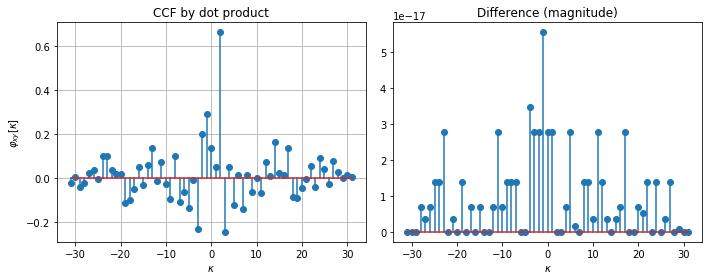

In [3]:
N = 32  # length of signals

# generate signals
np.random.seed(1)
x = np.random.normal(size=N)
y = np.convolve(x, [1, .5, .3, .7, .3], mode='same')

# compute CCF
ccf1 = 1/N * np.correlate(x, y, mode='full')
ccf2 = 1/N * ccf_by_dotprod(x, y)
kappa = np.arange(-N+1, N)

# plot results
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.stem(kappa, ccf1)
plt.xlabel('$\kappa$')
plt.ylabel(r'$\varphi_{xy}[\kappa]$')
plt.title('CCF by dot product')
plt.grid()

plt.subplot(122)
plt.stem(kappa, np.abs(ccf1-ccf2))
plt.xlabel('$\kappa$')
plt.title('Difference (magnitude)')
plt.tight_layout()

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples, 2016-2018*.